<a href="https://colab.research.google.com/github/gib-hub/frekuensi-dan-model-urban/blob/main/FrekuensiDanModelUrban.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
def cos(frek,tipe,ht,hr,d):
  #frek = frekuensi (MHz)
  #tipe = urban, suburban, open
  #ht = tinggi tower (meter)
  #hr = tinggi user (meter)
  #d = jarak (meter)
    if frek in range(150,1501):
        Ca=69.55
        Cb=26.16
    elif frek in range(1501,2001):
        Ca=46.3
        Cb=33.9
    
    if tipe=='urban' :
        Cm=0
    elif tipe=='suburban' :
        Cm= -2*((np.log10((frek/28)**2))-5.4)
    elif tipe=='open' :
        Cm= -4.78*(np.log10(frek))+18.33*(np.log10(frek))-40.94
    else :
        Cm='tipe salah'
    
    ahr = (1.1*np.log10(frek)-0.7)*hr-(1.56*np.log10(frek)-1.8)
    Lp = Ca+(Cb*np.log10(frek))-(13.83*np.log(ht))-ahr+((44.9-6.55*np.log10(ht))*np.log10(d))-Cm
    
    return Lp


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

f=1800 #MHz #frekuensi
loc_urban='urban' #lokasi ada di urban
loc_open='open'
loc_suburban='suburban'

tower=80 #m #tinggi tower
user=1.5 #m #tinggi user
dmin=200 #m #jarak paling pendek dari bts pemancar tower ke user
dmax=700 #m #jarak paling panjang dari bts pemancar tower ke user
N=200 #titik #user itu titiknya dimana aja ada 200 titik
d=np.random.randint(dmin,dmax,N) #menguarkan nilai random dmn angka paling kecil 200, paling besar 700, jumlah angka yg dikeluarkan secara random ada 200 

In [ ]:
LpUrban=cos(f,loc_urban,tower,user,d) #d=jarak #skrg mau di plot, sumbu x sebagai d, sumbu y sebagai urban
LpOpen=cos(f,loc_open,tower,user,d)
LpSubUrban=cos(f,loc_suburban,tower,user,d)


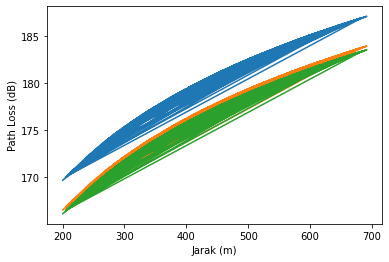

In [ ]:
plt.figure()
plt.plot(d,LpUrban)
plt.plot(d,LpOpen)
plt.plot(d,LpSubUrban)

plt.xlabel('Jarak (m)')
plt.ylabel('Path Loss (dB)')
plt.show() #berantakan karna titik ada 200, plot macem", tugasnya adalah nilai acak tadi menjadi berurutan

In [ ]:
d_sort=d[(np.argsort(d))] #d_sort adalah variabel yg menyimpan nilai d, tapi berurutan, dari mulai angka kecil sampai besar, mskipun input awalnya random
#mengurutkan d_sort yg sumbu x dan y otomatis sorting
Urban_sort=LpUrban[np.argsort(d)]
Open_sort=LpOpen[np.argsort(d)]
SubUrban_sort=LpSubUrban[np.argsort(d)]


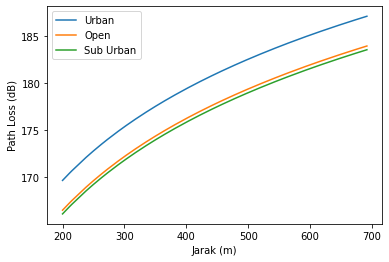

In [ ]:
plt.figure()
plt.plot(d_sort,Urban_sort,  label='Urban')
plt.plot(d_sort,Open_sort,  label='Open')
plt.plot(d_sort,SubUrban_sort,  label='Sub Urban')

plt.legend()
plt.xlabel('Jarak (m)')
plt.ylabel('Path Loss (dB)')
plt.show() 

In [ ]:
f1=700
f2=900
f3=1800
LpUrban1=cos(f1,loc_urban,tower,user,d)
LpUrban2=cos(f2,loc_urban,tower,user,d)
LpUrban3=cos(f3,loc_urban,tower,user,d)

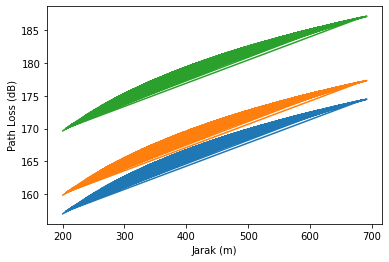

In [ ]:
plt.figure()
plt.plot(d,LpUrban1)
plt.plot(d,LpUrban2)
plt.plot(d,LpUrban3)

plt.xlabel('Jarak (m)')
plt.ylabel('Path Loss (dB)')
plt.show()

In [ ]:
d_sort=d[(np.argsort(d))] #d_sort adalah variabel yg menyimpan nilai d, tapi berurutan, dari mulai angka kecil sampai besar, mskipun input awalnya random
#mengurutkan d_sort yg sumbu x dan y otomatis sorting
Urban_sort1=LpUrban1[np.argsort(d)]
Urban_sort2=LpUrban2[np.argsort(d)]
Urban_sort3=LpUrban3[np.argsort(d)]


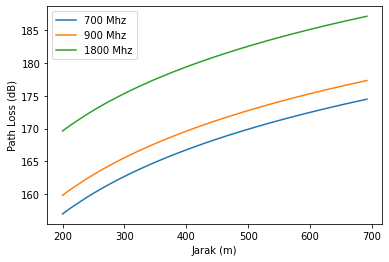

In [ ]:
plt.figure()
plt.plot(d_sort,Urban_sort1,  label='700 Mhz')
plt.plot(d_sort,Urban_sort2,  label='900 Mhz')
plt.plot(d_sort,Urban_sort3,  label='1800 Mhz')

plt.legend()
plt.xlabel('Jarak (m)')
plt.ylabel('Path Loss (dB)')
plt.show() 